# **Librerias Necesarias**

In [2]:
%run Proyecto_idDrRecursos.ipynb

# **Visualización de caracteristicas de una señal**

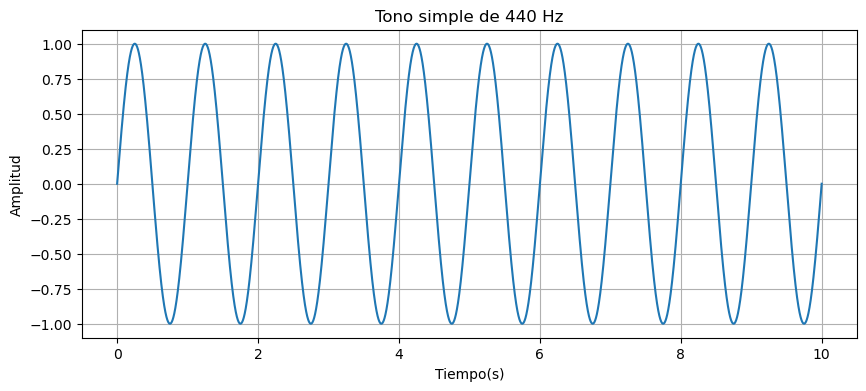

In [3]:
#Definicion de parametros del tono
frecuencia = 1 #Frecuencia en Hz
duracion = 10#Duracion del tono
tasa_muestreo =1000000#Taza de muestreo en Hz

tiempo = np.linspace(0,duracion, duracion * tasa_muestreo, endpoint=False)

#Generacion de la señal del tono como una onda sinusoidal 
tono = np.sin(2 * np.pi * frecuencia * tiempo)

#Visualizacion de la forma de onda del tono
plt.figure(figsize=(10,4))
plt.plot(tiempo, tono)
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")
plt.title("Tono simple de 440 Hz")
plt.grid(True)
plt.show()

### **Visualización de caracteristicas y espectro de frecuencias de una señal compleja**

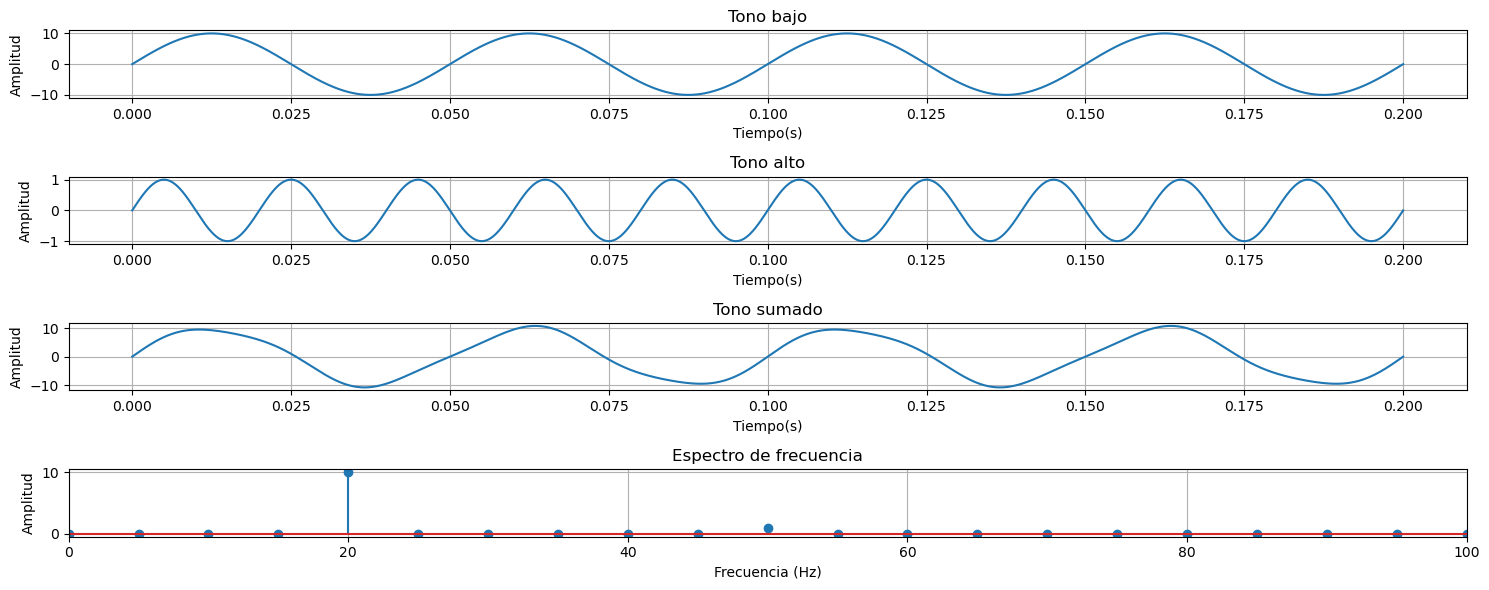

In [4]:
#Definimos parametros de la señal 
duracion = 5 #Duracion de la señal en segundos 
tasa_muestreo = 44100  #Taza de muestreo en Hz

#Generacion del vector de tiempo 
tiempo = np.linspace(0,2 * ( 1 / 10),tasa_muestreo)

#Definimos frecuencias de los tonos 
frecuencia_baja = 20
frecuencia_alta = 50


#Generamos los dos tonos simples
tono_bajo = 10 * np.sin( 2 * np.pi * frecuencia_baja * tiempo)
tono_alto = np.sin( 2 * np.pi * frecuencia_alta * tiempo)
senal_sumada = tono_bajo + tono_alto

#Calculo de la transformada de Fourier de la señal combinada 
fft_resultado = fft(senal_sumada)
fft_resultado = fft_resultado / (tasa_muestreo / 2)
frecuencias = np.fft.fftfreq(len(tiempo), d = tiempo[1] - tiempo[0])

#Visualizacion cada tono por separado incluyendo el espectro de frecuencias 
plt.figure(figsize = (15,6))

#Tono bajo 
plt.subplot(4,1,1)
plt.plot(tiempo, tono_bajo)
plt.title("Tono bajo")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")
plt.grid(True)

#Tono alto 
plt.subplot(4,1,2)
plt.plot(tiempo, tono_alto)
plt.title("Tono alto")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")
plt.grid(True)

#Suma de tonos
plt.subplot(4,1,3)
plt.plot(tiempo, senal_sumada)
plt.title("Tono sumado")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")
plt.grid(True)

#Visualizacion del espectro de frecuencias 
plt.subplot(4,1,4)
plt.stem(frecuencias[:len(frecuencias)//2], np.abs(fft_resultado)[:len(fft_resultado)//2])
plt.title("Espectro de frecuencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.xlim(0, frecuencia_alta * 2)
plt.grid(True)

plt.tight_layout()
plt.show()

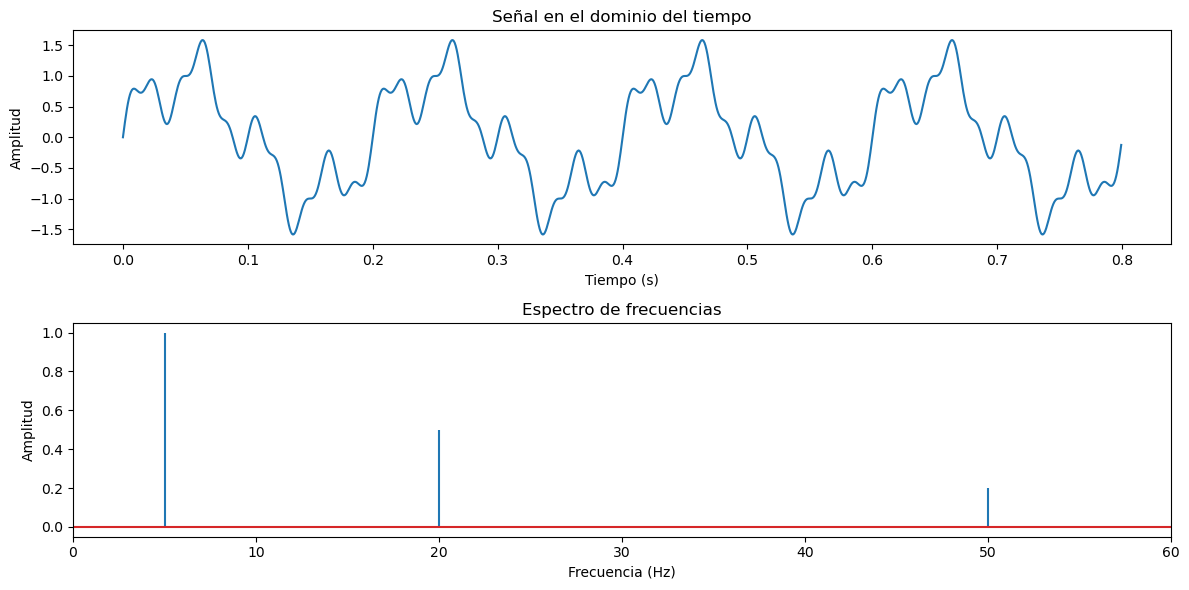

In [5]:
# Crear una señal de ejemplo
t = np.linspace(0, 4 * (1/5), 1000, endpoint=False)  # Vector de tiempo de 0 a 1 segundos
frequencies = [5, 20, 50]  # Frecuencias de las componentes sinusoidales
amplitudes = [1, 0.5, 0.2]  # Amplitudes de las componentes sinusoidales
signal = np.sum([amplitude * np.sin(2 * np.pi * frequency * t) for frequency, amplitude in zip(frequencies, amplitudes)], axis=0)

# Calcular la transformada de Fourier discreta
fft_result = np.fft.fft(signal)
fft_result /= (500)

# Calcular las frecuencias correspondientes a los coeficientes de la transformada
frequencies_fft = np.fft.fftfreq(len(signal), d=t[1]-t[0])
#Retorna de +F hasta -F
# Graficar la señal y su transformada de Fourier
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Señal en el dominio del tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(2, 1, 2)
plt.stem(frequencies_fft[0:len(frequencies_fft)//2], np.abs(fft_result)[0:len(fft_result)//2],\
         markerfmt=' ')
plt.title('Espectro de frecuencias')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.xlim(0, max(frequencies) + 10)

plt.tight_layout()
plt.show()

# **Espectro de frecuencia para ruido blanco**

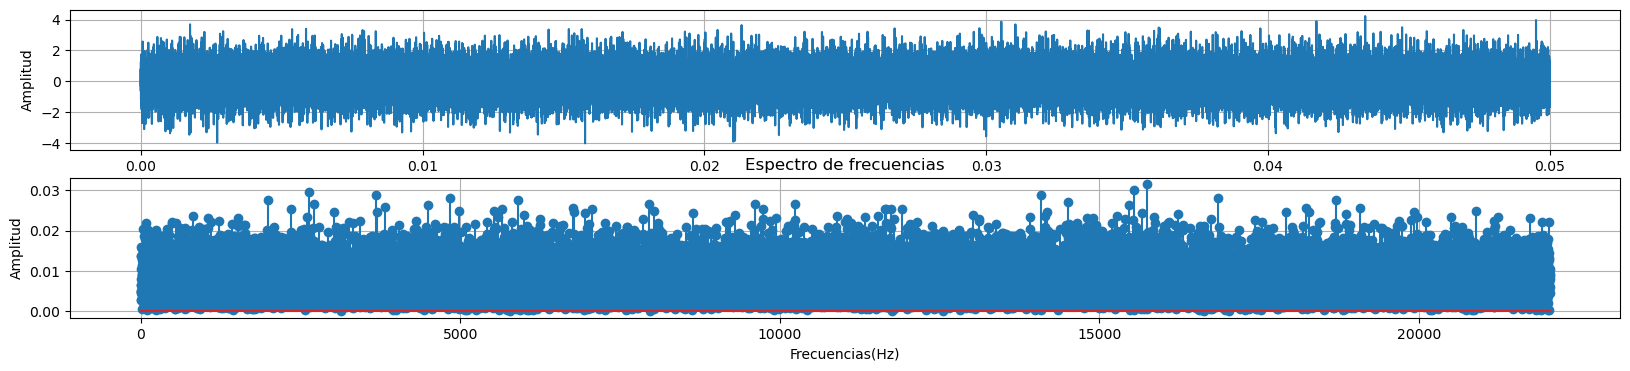

In [6]:
#Ruido blanco 
# Parámetros de la señal
frecuencia = 4 # Frecuencia en Hz
duracion = .05  # Duración en segundos
tasa_muestreo = 44100  # Tasa de muestreo en Hz

tiempo = np.linspace(0,duracion, tasa_muestreo, endpoint = False)
ruido_blanco = np.random.normal(0,1,len(tiempo))

#Calculamos las frecuencias correspondientes 
fft_resultado = fft(ruido_blanco)
fft_resultado /= (tasa_muestreo / 2)
frecuencias = np.fft.fftfreq(len(tiempo), d=1/tasa_muestreo)

#Visualizacion del ruido blanco 
plt.figure(figsize = (20,4))

#Visualizacion del ruido blanco 
plt.subplot(2,1,1)
plt.plot(tiempo, ruido_blanco)
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")
plt.grid(True)

#Visualizacion del espectro de frecuencias 
plt.subplot(2,1,2)
plt.stem(frecuencias[:len(frecuencias)//2],np.abs(fft_resultado)[:len(fft_resultado)//2])
plt.xlabel("Frecuencias(Hz)")
plt.ylabel("Amplitud")
plt.title("Espectro de frecuencias")
plt.grid(True)


plt.show()

### **Visualización de espectro de frecuecia para una señal de una solo frecuencia**

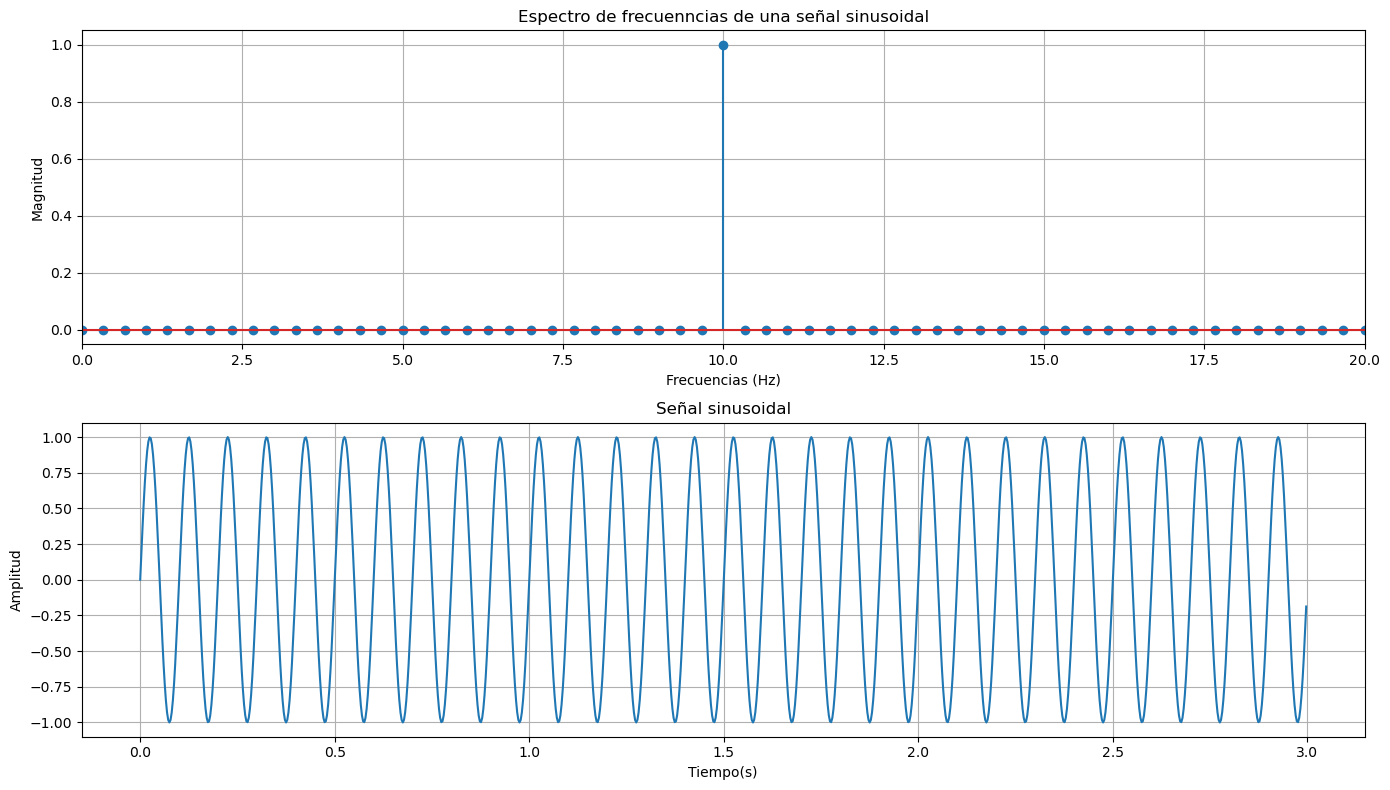

In [7]:
#Parametros de la señal
frecuencia = 10
duracion = 3
tasa_muestreo = 1000

#Vector de tiempo
tiempo = np.linspace(0,duracion, tasa_muestreo, endpoint = False)

#Generacion de señal sinuidal 
senal = np.sin(2 * np.pi * frecuencia * tiempo)

#Transformada de fourier 
transformada = np.fft.fft(senal)
transformada /= (tasa_muestreo / 2)
frecuencias = np.fft.fftfreq(len(transformada), d = tiempo[1] - tiempo[0])

plt.figure(figsize = (14,8))

#Visualizacion del espectro de frecuencias 
plt.subplot(2,1,1)
plt.stem(frecuencias[:len(frecuencias)//2], np.abs(transformada)[:len(transformada)//2])
plt.title("Espectro de frecuenncias de una señal sinusoidal")
plt.xlabel("Frecuencias (Hz)")
plt.ylabel("Magnitud")
plt.xlim(0, frecuencia * 2)
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(tiempo,senal)
plt.title("Señal sinusoidal")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")
plt.grid(True)

plt.tight_layout()
plt.show()

### **Visualización de espectro de frecuencias para un pulso**

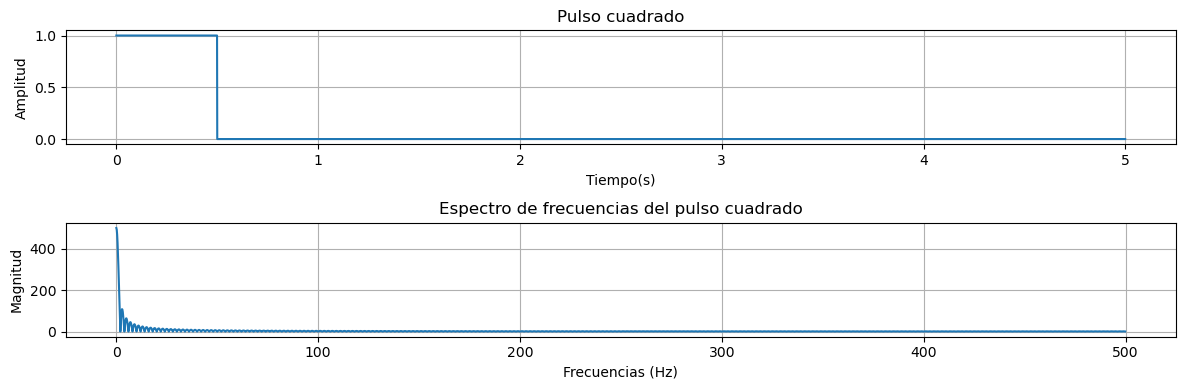

In [8]:
duracion = 5
tasa_muestreo = 1000

tiempo = np.linspace(0,duracion,duracion * tasa_muestreo, endpoint= False)

senal = np.where(tiempo < 0.5, 1,0)

transformada = np.fft.fft(senal)
frecuencias = np.fft.fftfreq(len(transformada),d = 1 / tasa_muestreo)

plt.figure(figsize = (12,4))

plt.subplot(2,1,1)
plt.plot(tiempo,senal)
plt.title("Pulso cuadrado")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")
plt.grid(True)


plt.subplot(2,1,2)
plt.plot(frecuencias[:len(frecuencias)//2], np.abs(transformada)[:len(transformada)//2])
plt.title("Espectro de frecuencias del pulso cuadrado")
plt.xlabel("Frecuencias (Hz)")
plt.ylabel("Magnitud")
plt.grid(True)

plt.tight_layout()
plt.show()

### **Visualización de acercamiento a señal cuadrada a traves de transformada de Fourier**

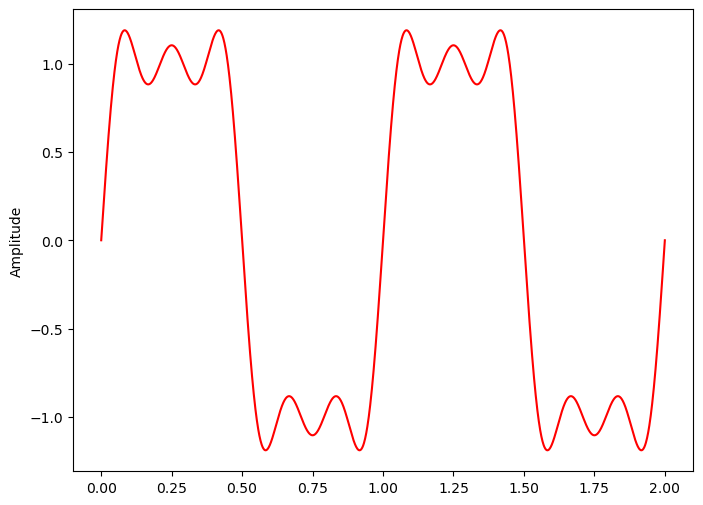

In [9]:
#sample rate 
sr = 2000
ts = 1.0 / sr
#Frequency
freq = 1
#axe t 
t =  np.linspace(0, 2 * (1 / freq), sr)
#Amplitud 
A = 4 / np.pi
#Func
x = A  * np.sin(2 * np.pi * freq * t)
x +=  A * (1 / 3) * np.sin(2 * np.pi * freq * 3 * t)
x +=  A * (1 / 5) * np.sin(2 * np.pi * freq * 5 * t)

plt.figure(figsize= (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')
plt.show()

NameError: name 'ifft' is not defined

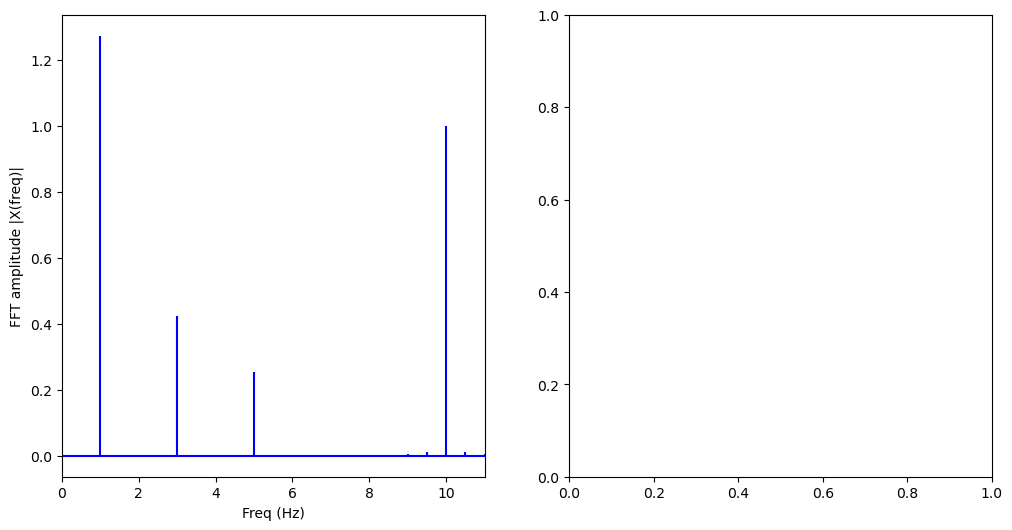

In [10]:
# sample rate 
sr = 2000
ts = 1.0 / sr

# Frecuencias
freq1 = 1
freq2 = 3
freq3 = 5
freq4 = 10
# Eje t 
t = np.linspace(0, 2 * (1 / freq1), sr)

# Amplitud 
A = 4 / np.pi

# Función
x = A * np.sin(2 * np.pi * freq1 * t)
x += A * (1 / 3) * np.sin(2 * np.pi * freq2 * t)
x += A * (1 / 5) * np.sin(2 * np.pi * freq3 * t)
x += np.cos(2 * np.pi * freq4 * t)

X = fft(x)
X /= (sr / 2)
N = len(X)
n = np.arange(N)
T = N / sr
freq = n / T 
freq /= 2
freq_lim = max([freq1, freq2, freq3, freq4]) + 1

plt.figure(figsize=(12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', basefmt="-b", \
         markerfmt=' ')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT amplitude |X(freq)|')
plt.xlim(0, freq_lim)  

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

